# ZeroBias Dataset

In [253]:
from omsapi import OMSAPI
import pandas as pd
import matplotlib.pyplot as plt
import mplhep as hep
import numpy as np
#statmodels version 0.14.0
from statsmodels.tsa.stattools import acf,pacf 
from statsmodels.graphics.tsaplots import plot_pacf,plot_acf
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.stattools import adfuller
import warnings

### Fetching Data from OMSAPI

In [154]:
#fetching zerobias data
omsapi = OMSAPI(api_url="https://vocms0185.cern.ch/agg/api", api_version="v1", cert_verify=False)
omsapi.auth_oidc("oms-api-client", "4577f6da-bbf7-4f5e-a898-f8db325e7e5e", audience="cmsoms-int-0185")
q = omsapi.query('datasetrates').paginate(page=1,per_page=1000).filter('run_number',315721).filter('dataset_name','ZeroBias')
response_data = q.data()
folded_json = response_data.json()

https://vocms0185.cern.ch/agg/api/v1/datasetrates/?filter[run_number][EQ]=315721&filter[dataset_name][EQ]=ZeroBias&page[offset]=0&page[limit]=1000


In [155]:
#Data Preparation
df_zerobias = pd.json_normalize(folded_json['data'])
df_zerobias = df_zerobias.rename(columns={'attributes.first_lumisection_number':'Lumisection'})
df_zerobias.set_index('Lumisection',inplace=True)
df_zerobias=df_zerobias[23:628]
df_zerobias


,id,type,attributes.start_time,attributes.last_lumisection_number,attributes.rate,attributes.run_number,attributes.last_lumisection_in_run,attributes.dataset_name,attributes.cms_active,attributes.events,links.self
Lumisection,,,,,,,,,,,
33,315721__ZeroBias__33,datasetrates,2018-05-05T05:08:13Z,33,47.618211,315721,640,ZeroBias,True,1110,https://https://vocms0185.cern.ch/agg/api/v1/d...
34,315721__ZeroBias__34,datasetrates,2018-05-05T05:08:37Z,34,63.748344,315721,640,ZeroBias,True,1486,https://https://vocms0185.cern.ch/agg/api/v1/d...
35,315721__ZeroBias__35,datasetrates,2018-05-05T05:09:00Z,35,63.061955,315721,640,ZeroBias,True,1470,https://https://vocms0185.cern.ch/agg/api/v1/d...
36,315721__ZeroBias__36,datasetrates,2018-05-05T05:09:23Z,36,36.979187,315721,640,ZeroBias,True,862,https://https://vocms0185.cern.ch/agg/api/v1/d...
37,315721__ZeroBias__37,datasetrates,2018-05-05T05:09:47Z,37,63.834142,315721,640,ZeroBias,True,1488,https://https://vocms0185.cern.ch/agg/api/v1/d...
...,...,...,...,...,...,...,...,...,...,...,...
634,315721__ZeroBias__634,datasetrates,2018-05-05T09:01:43Z,634,9.823937,315721,640,ZeroBias,True,229,https://https://vocms0185.cern.ch/agg/api/v1/d...
635,315721__ZeroBias__635,datasetrates,2018-05-05T09:02:06Z,635,8.965951,315721,640,ZeroBias,True,209,https://https://vocms0185.cern.ch/agg/api/v1/d...
636,315721__ZeroBias__636,datasetrates,2018-05-05T09:02:30Z,636,9.223347,315721,640,ZeroBias,True,215,https://https://vocms0185.cern.ch/agg/api/v1/d...


In [145]:
#fetching zerobias paths 
df_zerobias_dict={}
path_name_list=['HLT_Random_v3',
                'HLT_ZeroBias_FirstBXAfterTrain_v3',
                'HLT_ZeroBias_FirstCollisionAfterAbortGap_v5',
                'HLT_ZeroBias_FirstCollisionInTrain_v4',
                'HLT_ZeroBias_IsolatedBunches_v5',
                'HLT_ZeroBias_LastCollisionInTrain_v3',
                'HLT_ZeroBias_v6'
                ]
for i in path_name_list : 
    q_path = omsapi.query("hltpathrates").paginate(page=1, per_page=1000).filter("run_number",315721).filter("path_name",i)
    response=q_path.data()
    path_folded_json=response.json()
    df=pd.json_normalize(path_folded_json['data'])
    df.set_index('attributes.first_lumisection_number',inplace=True)
    df=df[23:628]
    df_zerobias_dict[i]=df

https://vocms0185.cern.ch/agg/api/v1/hltpathrates/?filter[run_number][EQ]=315721&filter[path_name][EQ]=HLT_Random_v3&page[offset]=0&page[limit]=1000
https://vocms0185.cern.ch/agg/api/v1/hltpathrates/?filter[run_number][EQ]=315721&filter[path_name][EQ]=HLT_ZeroBias_FirstBXAfterTrain_v3&page[offset]=0&page[limit]=1000
https://vocms0185.cern.ch/agg/api/v1/hltpathrates/?filter[run_number][EQ]=315721&filter[path_name][EQ]=HLT_ZeroBias_FirstCollisionAfterAbortGap_v5&page[offset]=0&page[limit]=1000
https://vocms0185.cern.ch/agg/api/v1/hltpathrates/?filter[run_number][EQ]=315721&filter[path_name][EQ]=HLT_ZeroBias_FirstCollisionInTrain_v4&page[offset]=0&page[limit]=1000
https://vocms0185.cern.ch/agg/api/v1/hltpathrates/?filter[run_number][EQ]=315721&filter[path_name][EQ]=HLT_ZeroBias_IsolatedBunches_v5&page[offset]=0&page[limit]=1000
https://vocms0185.cern.ch/agg/api/v1/hltpathrates/?filter[run_number][EQ]=315721&filter[path_name][EQ]=HLT_ZeroBias_LastCollisionInTrain_v3&page[offset]=0&page[lim

In [146]:
#Path name of zerobias dataset 
number = 0
for i in list(df_singlemuon_dict.keys()):
    print(number, i)
    number+=1
number_list=range(number)

0 HLT_Random_v3
1 HLT_ZeroBias_FirstBXAfterTrain_v3
2 HLT_ZeroBias_FirstCollisionAfterAbortGap_v5
3 HLT_ZeroBias_FirstCollisionInTrain_v4
4 HLT_ZeroBias_IsolatedBunches_v5
5 HLT_ZeroBias_LastCollisionInTrain_v3
6 HLT_ZeroBias_v6


## Data Displaying

In [147]:
notion = "Dataset : ZeroBias\nRun 315721\n"

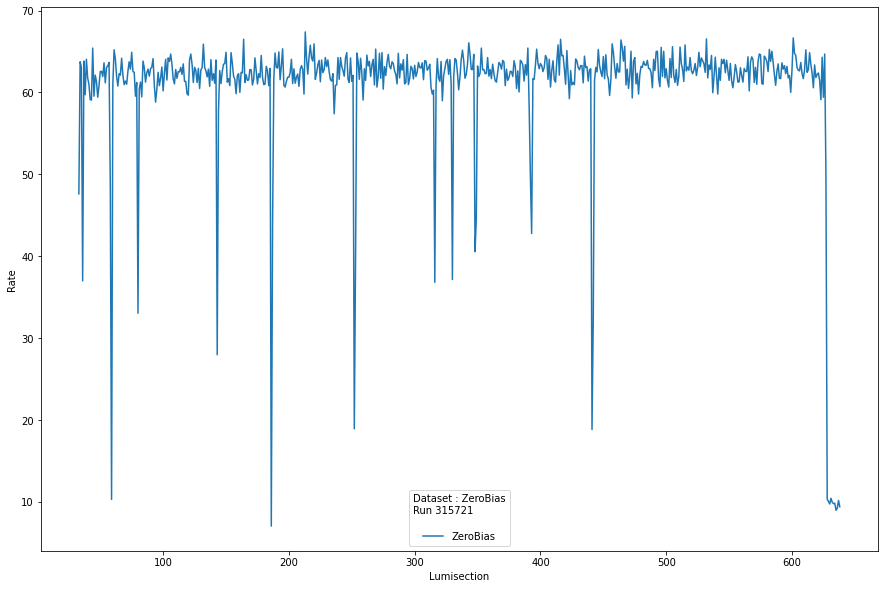

In [148]:
f,ax = plt.subplots(figsize=(15,10))
df_zerobias['attributes.rate'].plot(ax=ax,label=df_zerobias['attributes.dataset_name'][100])
plt.ylabel("Rate")
plt.legend(title=notion)


c:\Users\Kasidit\Desktop\TkDPG-Summer-Student-Time-Series-Analysis\venv\lib\site-packages\statsmodels\tsa\stattools.py:681: RuntimeWarning: invalid value encountered in divide
  acf = avf[: nlags + 1] / avf[0]


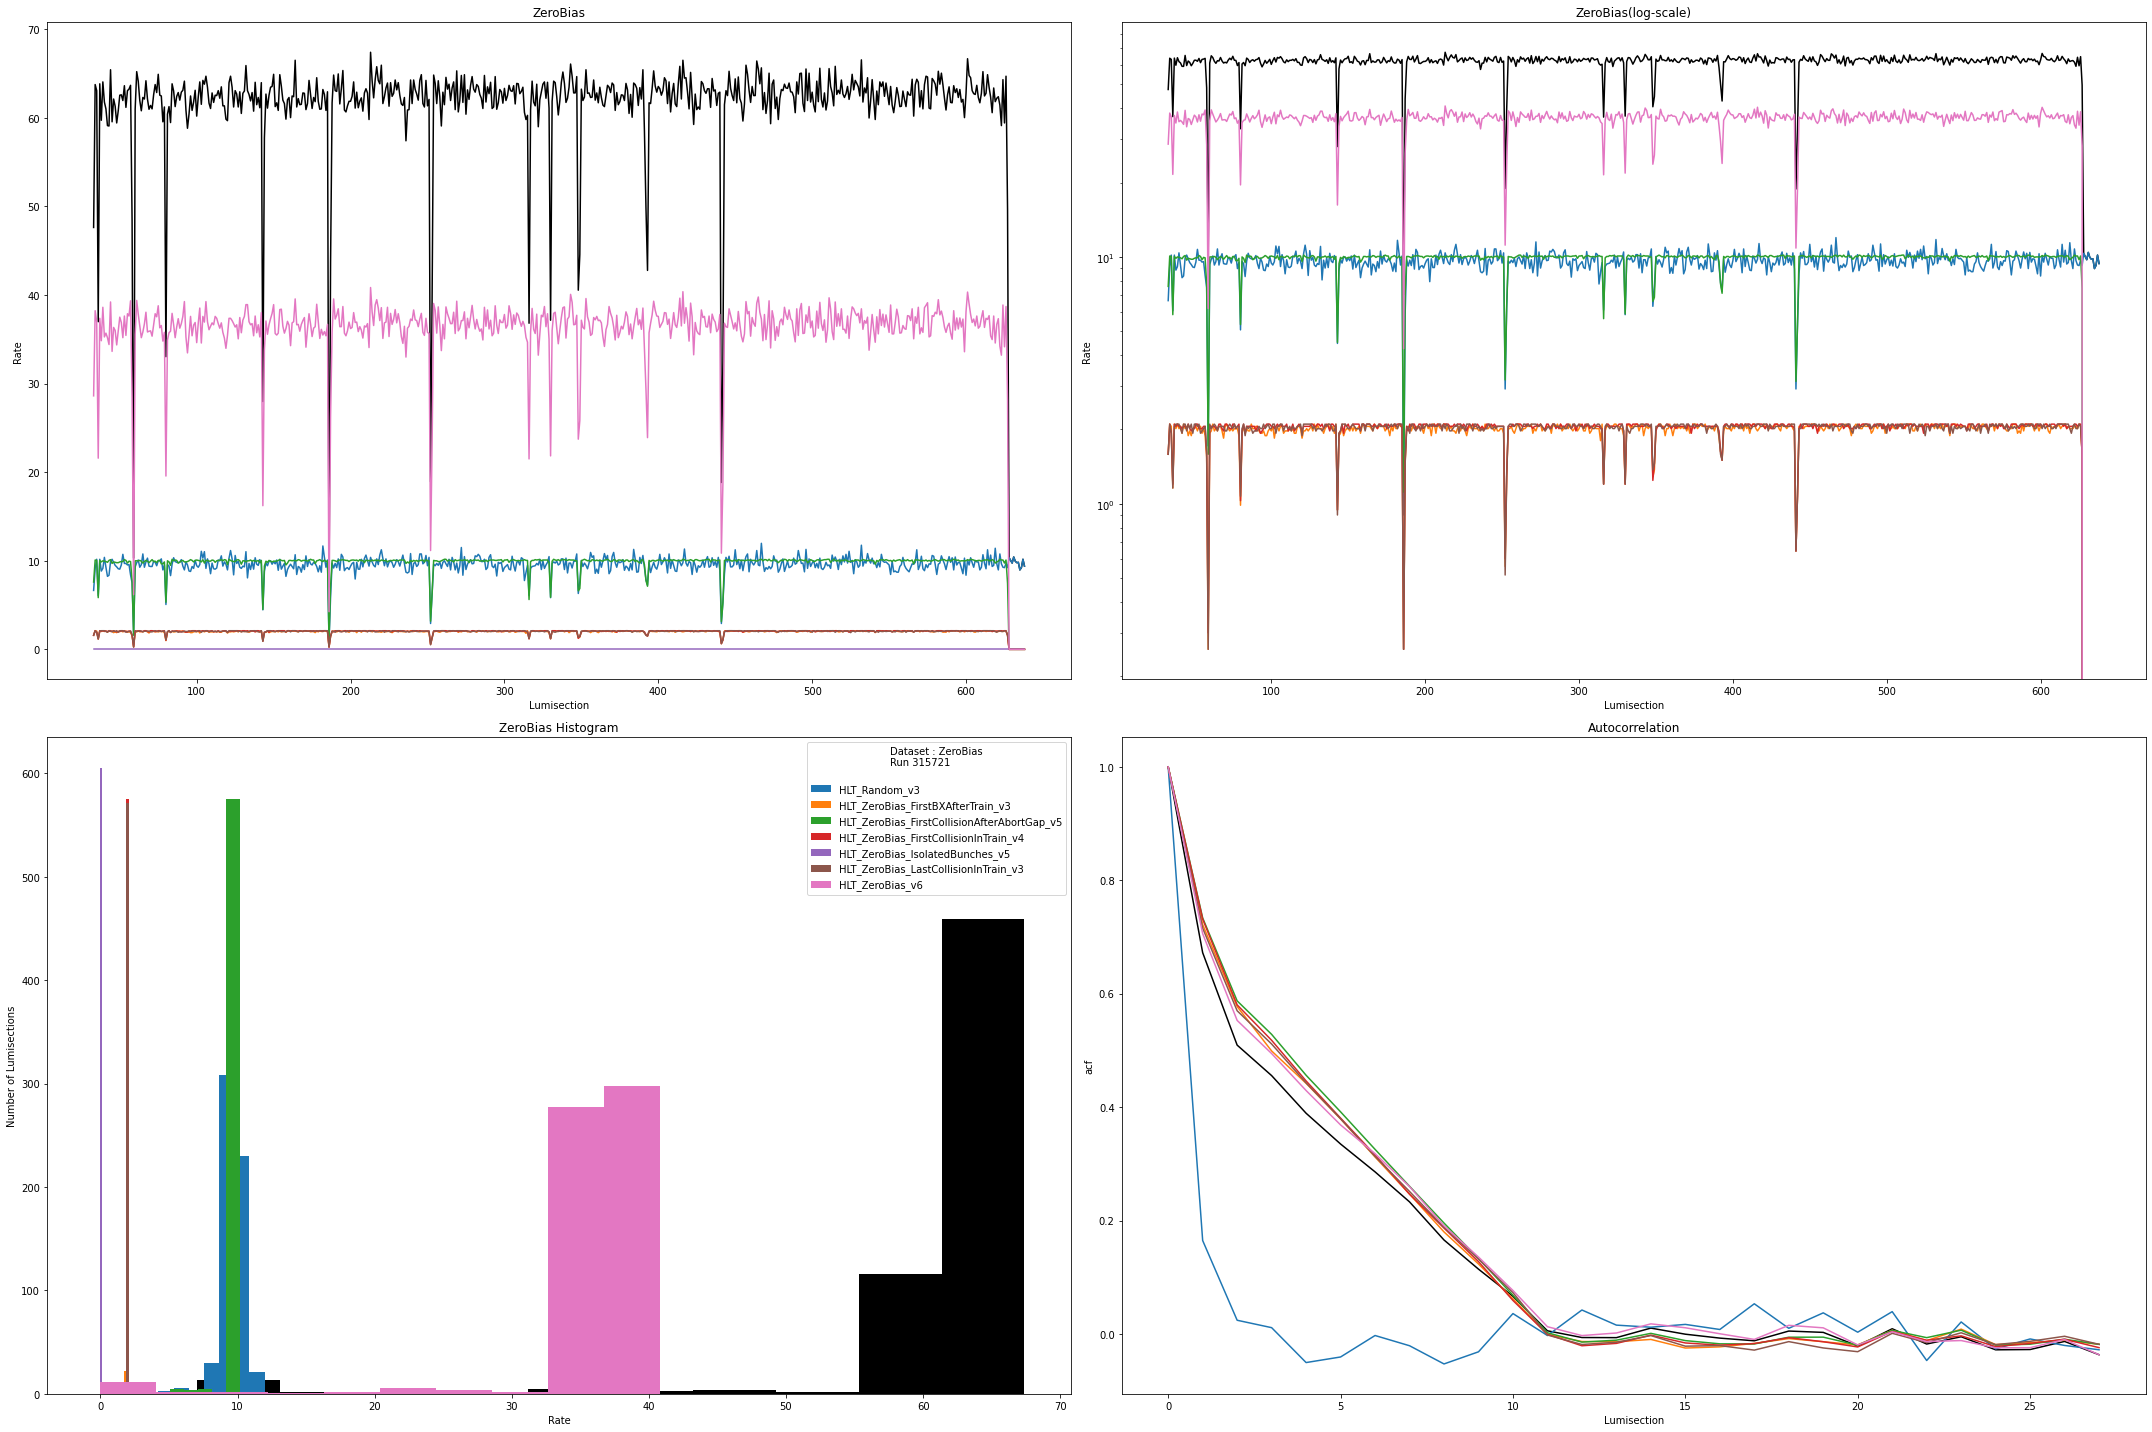

In [222]:
key_list = list(df_zerobias_dict.keys())
f,([ax1,ax2],[ax3,ax4])=plt.subplots(2,2,figsize=(30,20))
#comparing to zerobias data
ax1.plot(df_zerobias['attributes.rate'],color='black')
ax2.plot(df_zerobias['attributes.rate'],color='black')
ax3.hist(df_zerobias['attributes.rate'],color='black')
ax4.plot(acf(df_zerobias['attributes.rate']),color='black')
for i in number_list:
    path_rate=df_zerobias_dict[key_list[i]]["attributes.rate"]
    path_name=df_zerobias_dict[key_list[i]]["attributes.path_name"][100]
    #plot interesting graphes
    ax1.plot(path_rate)
    ax2.plot(path_rate)
    ax2.set_yscale('log')
    ax3.hist(path_rate,label=path_name)
    ax4.plot(acf(path_rate))
    #description
    ax3.legend(title=notion)
    ax1.set_xlabel('Lumisection')
    ax1.set_ylabel('Rate')
    ax1.set_title('ZeroBias')
    ax2.set_xlabel('Lumisection')
    ax2.set_ylabel('Rate')
    ax2.set_title('ZeroBias(log-scale)')
    ax3.set_ylabel('Number of Lumisections')
    ax3.set_xlabel('Rate')
    ax3.set_title('ZeroBias Histogram')
    ax4.set_xlabel('Lumisection')
    ax4.set_ylabel('acf')
    ax4.set_title('Autocorrelation')
    plt.tight_layout()  

#### Selected Paths 
1. HLT_ZeroBias_v6
2. HLT_Random_v3

### TimeSeries Properties 

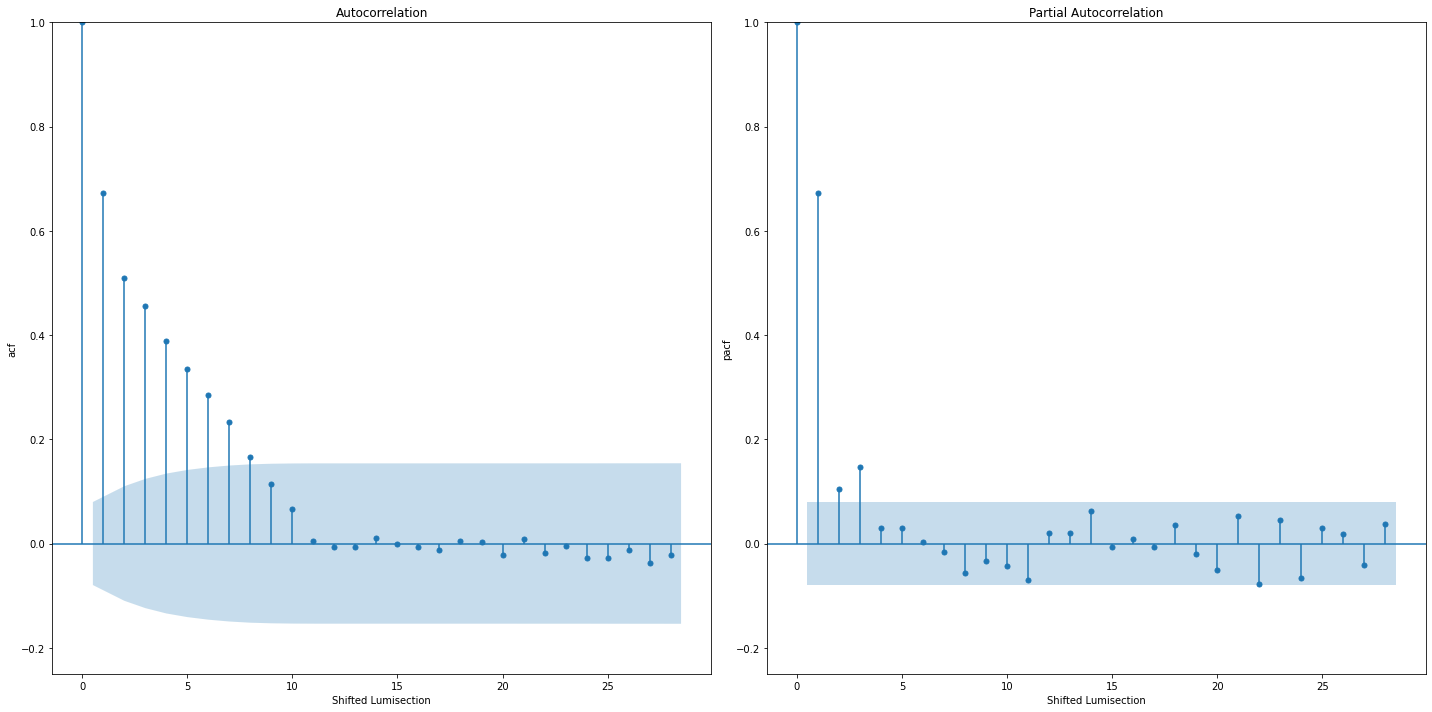

In [169]:
f,(ax1,ax2)=plt.subplots(1,2,figsize=(20,10))
plot_acf(df_zerobias['attributes.rate'],ax=ax1)
ax1.set_xlabel('Shifted Lumisection')
ax1.set_ylabel('acf')
ax1.set_ylim([-.25,1])
plot_pacf(df_zerobias['attributes.rate'],ax=ax2)
ax2.set_xlabel('Shifted Lumisection')
ax2.set_ylabel('pacf')
ax2.set_ylim([-.25,1])
plt.tight_layout()
#ax1.plot(acf(df_zerobias['attributes.rate'],nlags=604))
#ax1.set_title("Autocorrelation")
#ax1.set_xlabel('Shifted Lumisection')
#ax1.set_ylabel('acf')

In [151]:
#Check with the null hypothesis : Time Series is non-stationary with confidental interval 95%
result=adfuller(df_zerobias['attributes.rate'], autolag='AIC')
print('ADF Statistic: %.4f'%result[0])
print(f'n_lags: {result[2]}')
print('p-value: %.4f'%result[1])
print('Critial Values')
for key, value in result[4].items():
    print(f'{key} :','%.4f'%value)  

ADF Statistic: -2.1606
n_lags: 5
p-value: 0.2209
Critial Values
1% : -3.4413
5% : -2.8664
10% : -2.5693


## ARIMA model

In [255]:
order=(5,0,0)
model=ARIMA(df_zerobias["attributes.rate"],order=order)
fitted_model=model.fit()
fitted_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:        attributes.rate   No. Observations:                  605
Model:                 ARIMA(5, 0, 0)   Log Likelihood               -1959.761
Date:                Mon, 11 Jul 2022   AIC                           3933.522
Time:                        16:19:43   BIC                           3964.359
Sample:                             0   HQIC                          3945.522
                                - 605                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         59.5170      3.506     16.977      0.000      52.646      66.388
ar.L1          0.5747      0.020     29.263      0.000       0.536       0.613
ar.L2          0.0194      0.027      0.730      0.466      -0.033       0.071
ar.L3          0.1533      0.033      4.615      0.000       0.088       0.218
ar.L4          0.0501      0.052      0.964      0.335      -0.052       0.152
ar.L5          0.0827      0.050      1.638      0.102      -0.016       0.182
sigma2        38.0392      0.894     42.543      0.000      36.287      39.792
===================================================================================
Ljung-Box (L1) (Q):                   0.02   Jarque-Bera (JB):             24584.20
Prob(Q):                              0.89   Prob(JB):                         0.00
Heteroskedasticity (H):               0.59   Skew:                            -4.07
Prob(H) (two-sided):                  0.00   Kurtosis:                        33.15
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

Text(0.5, 1.0, 'ZeroBias')

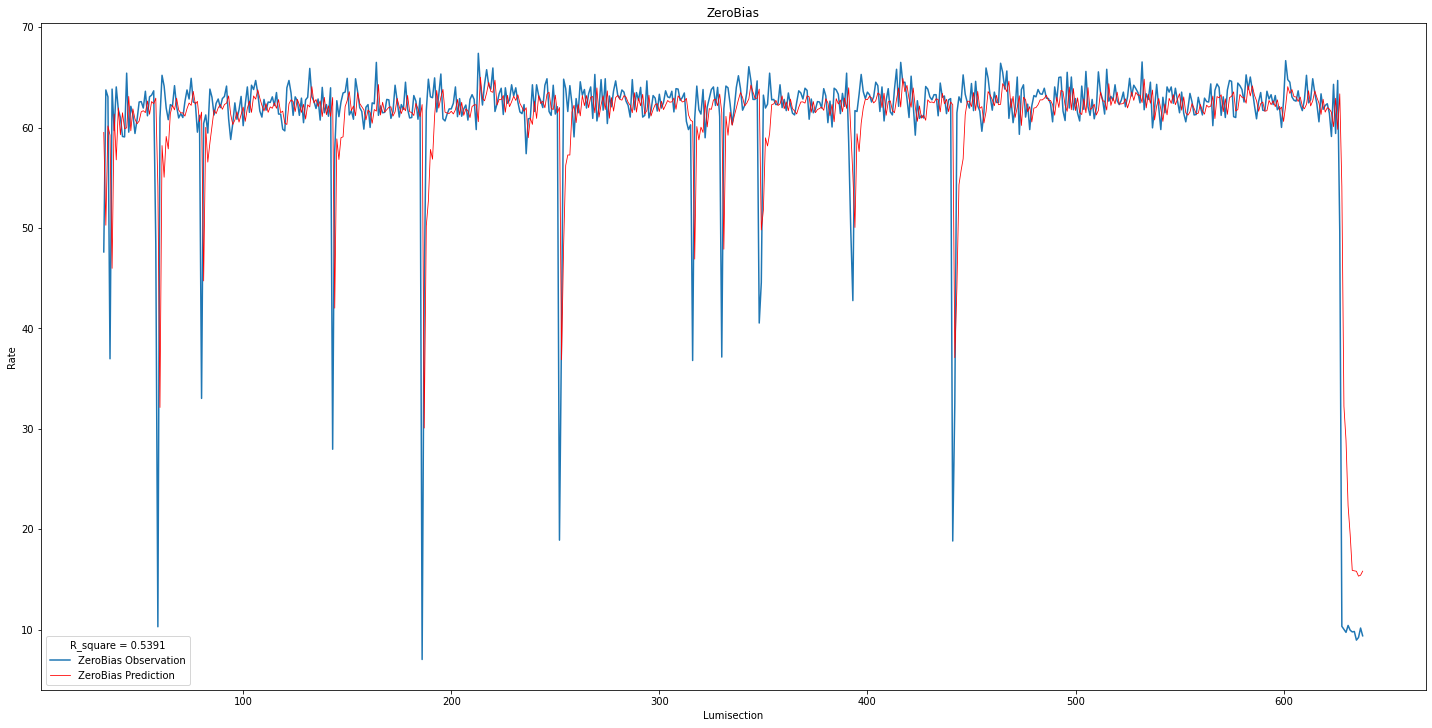

In [239]:
plt.subplots(figsize=(20,10))
predict=fitted_model.predict(start=0,end=604)
corr_matrix=np.corrcoef(df['attributes.rate'],predict)
corr=corr_matrix[0,1]
R_sq=corr**2
plt.plot(df_zerobias['attributes.rate'],label='ZeroBias Observation')
plt.plot(predict,label='ZeroBias Prediction',color='r',lw='0.8')
plt.legend(title='R_square = {:.4f}'.format(R_sq))
plt.xlabel("Lumisection")
plt.ylabel("Rate")
plt.tight_layout()
plt.title("ZeroBias")

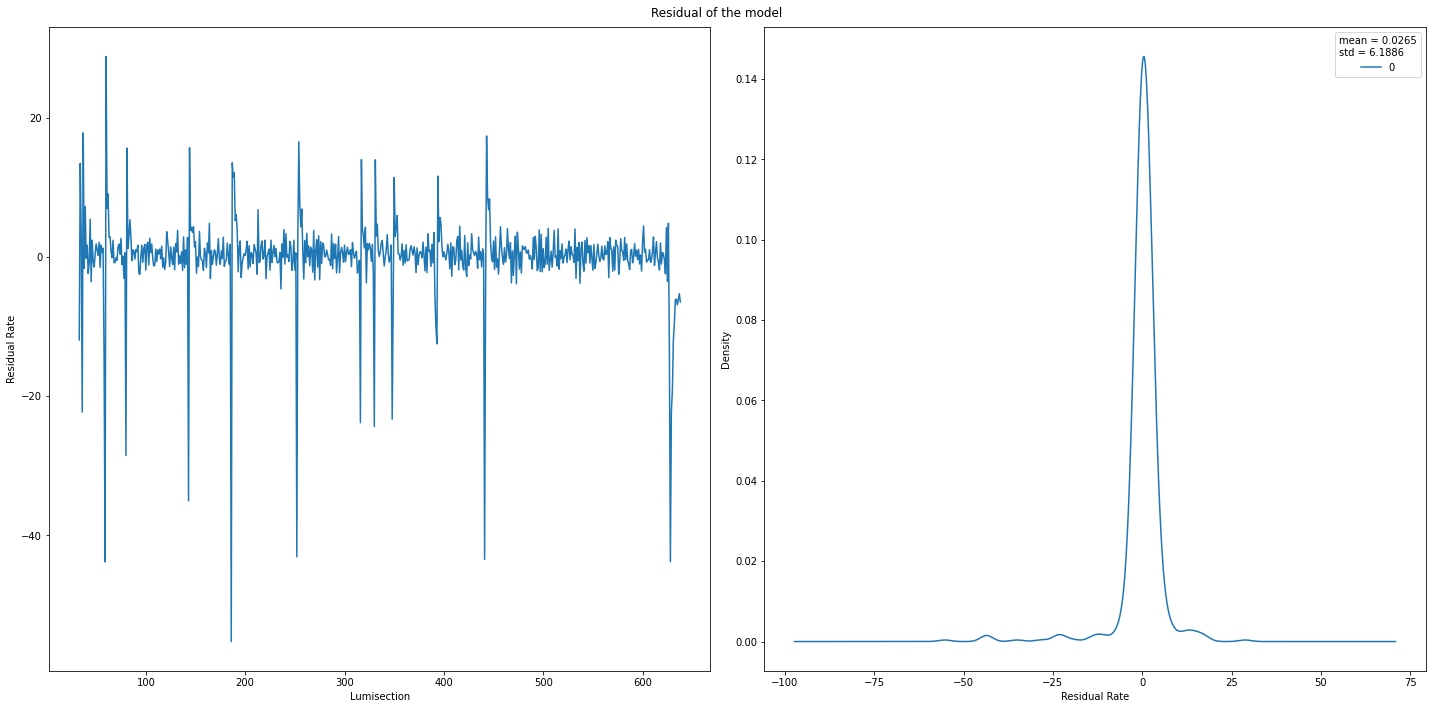

In [213]:
f,(ax1,ax2) = plt.subplots(1,2,figsize=(20,10))
residual = pd.DataFrame(fitted_model.resid)
resid_descript=residual.describe()
ax1.plot(residual)
ax1.set_xlabel("Lumisection")
ax1.set_ylabel("Residual Rate")
residual.plot(ax=ax2,kind='kde')
ax2.set_xlabel("Residual Rate")
plt.suptitle("Residual of the model")
plt.legend(title='mean = %.4f'%resid_descript.loc['mean']+'\nstd = %.4f'%resid_descript.loc['std'])
plt.tight_layout()


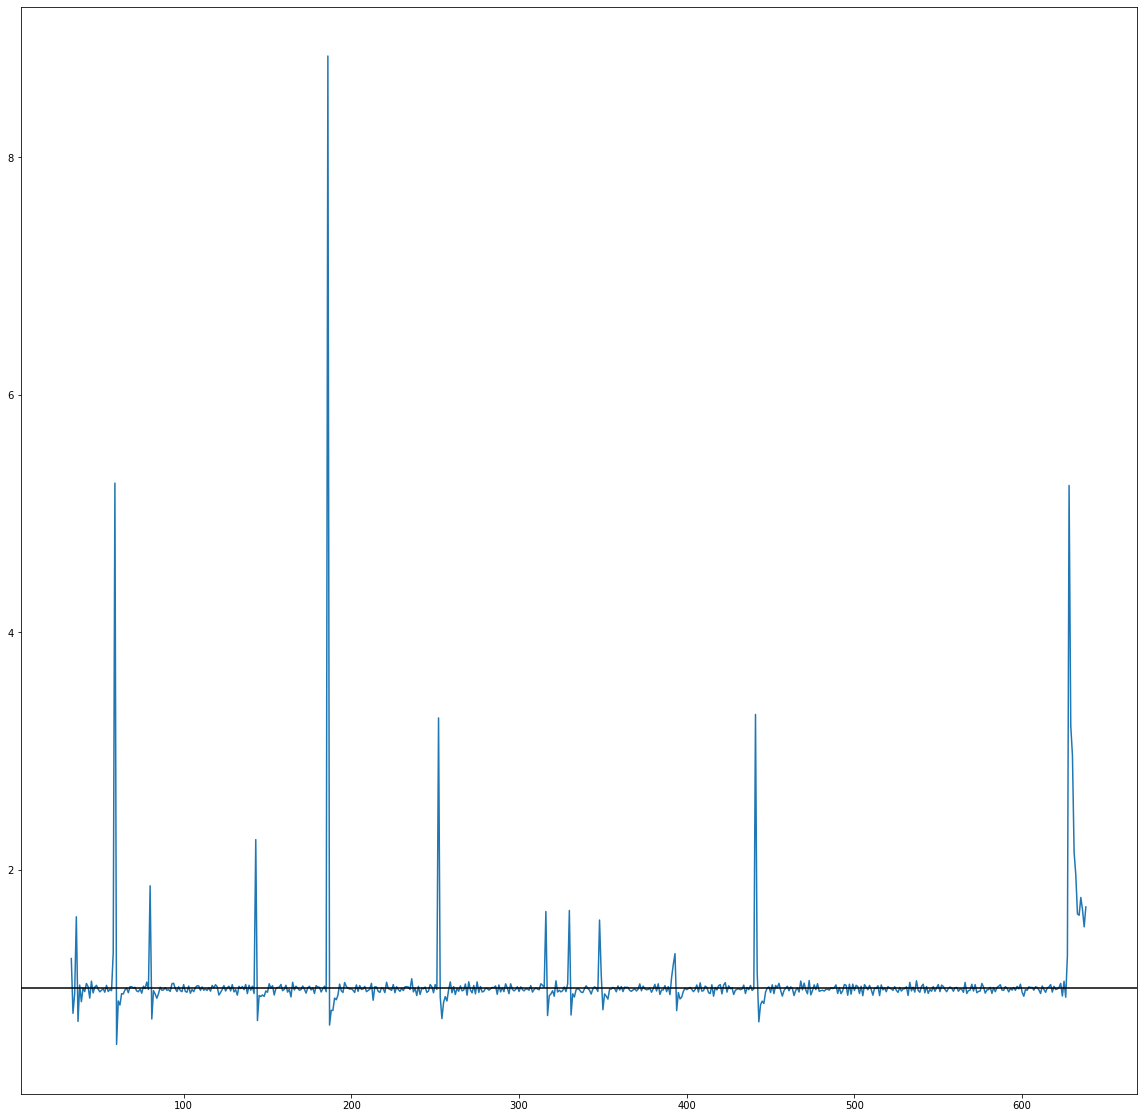

In [219]:
#The Ratio Different between model rate and predicted rate
plt.subplots(figsize=(20,20))
plt.plot(predict/df_zerobias['attributes.rate'])
plt.axhline(y=1,color='black')


Text(0.5, 1.0, 'HLT_Random_v3')

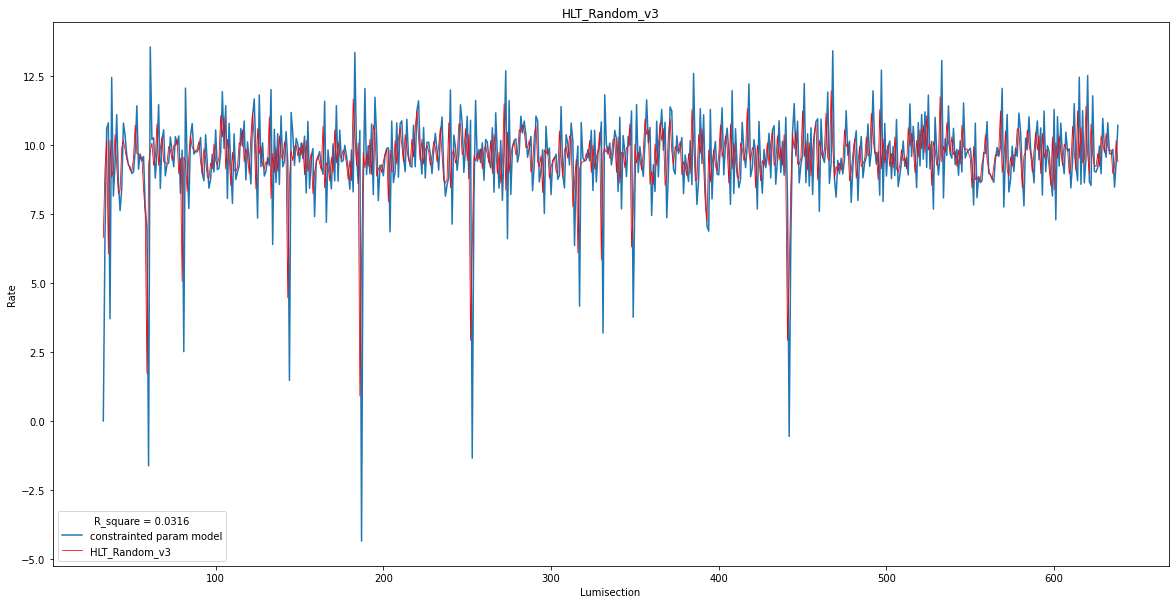

In [260]:
#fitting path's ARIMA by imposing the constrained params from singlemuon model
random_rate=df_singlemuon_dict['HLT_Random_v3']
path_model=ARIMA(random_rate['attributes.rate'],order=(2,1,0))
path_model_constrained_fit=path_model.fit_constrained({'ar.L1':fitted_model.arparams[0],'ar.L2':fitted_model.arparams[1]})
path_model_constrained_fit.summary()
path_model_constrained_predict=path_model_constrained_fit.predict(start=0,end=604)
#R_Square Calculation
corr_matrix=np.corrcoef(random_rate['attributes.rate'],path_model_constrained_predict)
corr=corr_matrix[0,1]
R_sq=corr**2
#Plot
plt.subplots(figsize=(20,10))
#Ordinary data plot
plt.plot(path_model_constrained_predict,label='constrainted param model')
#Predicted data plot
plt.plot(random_rate['attributes.rate'],label=random_rate['attributes.path_name'][100],color='r',lw='0.8')
plt.legend(title='R_square = {:.4f}'.format(R_sq))
plt.xlabel("Lumisection")
plt.ylabel("Rate")
plt.title(random_rate["attributes.path_name"][100])

In [ ]:
corr_matrix=np.corrcoef(random_rate['attributes.rate'],df_zerobias['attributes.rate'])
corr=corr_matrix[0,1]
R_sq=corr**2
print("Correlation between rate of path 'HLT_Random_v3' and dataset 'ZeroBias' is %.4f"%R_sq)

Correlation between rate of path 'HLT_Random_v3' and dataset 'ZeroBias' is 0.2362


Text(0.5, 1.0, 'HLT_ZeroBias_v6')

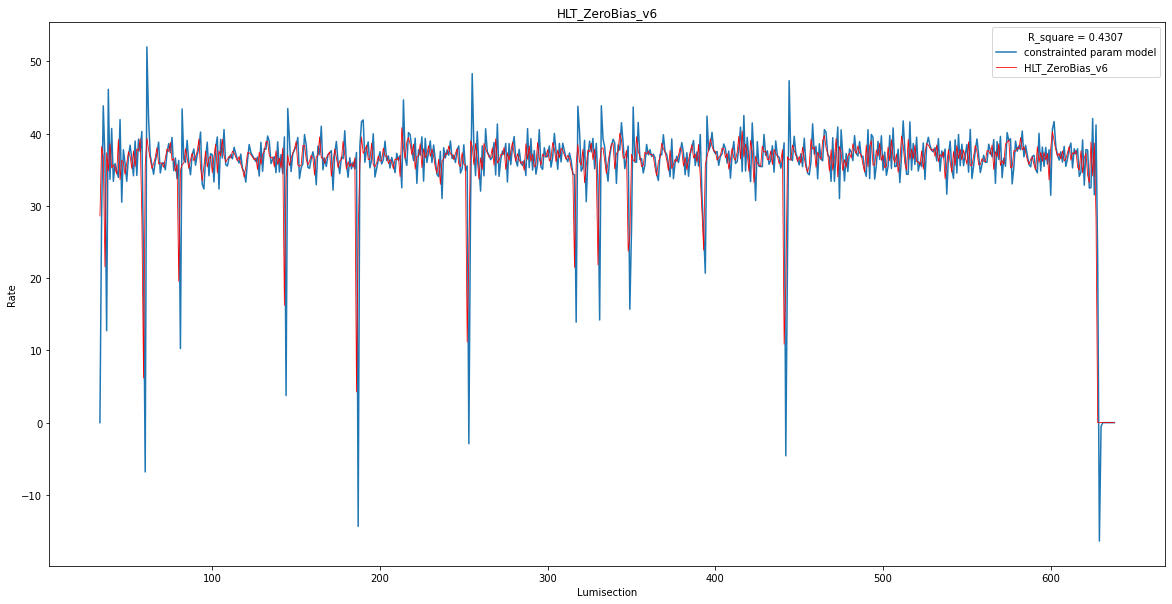

In [259]:
#fitting path's ARIMA by imposing the constrained params from singlemuon model
zerobias_rate=df_singlemuon_dict['HLT_ZeroBias_v6']
path_model=ARIMA(zerobias_rate['attributes.rate'],order=(2,1,0))
path_model_constrained_fit=path_model.fit_constrained({'ar.L1':fitted_model.arparams[0],'ar.L2':fitted_model.arparams[1]})
path_model_constrained_fit.summary()
path_model_constrained_predict=path_model_constrained_fit.predict(start=0,end=604)
#R_Square Calculation
corr_matrix=np.corrcoef(zerobias_rate['attributes.rate'],path_model_constrained_predict)
corr=corr_matrix[0,1]
R_sq=corr**2
#Plot
plt.subplots(figsize=(20,10))
#Ordinary data plot
plt.plot(path_model_constrained_predict,label='constrainted param model')
#Predicted data plot
plt.plot(zerobias_rate['attributes.rate'],label=zerobias_rate['attributes.path_name'][100],color='r',lw='0.8')
plt.legend(title='R_square = {:.4f}'.format(R_sq))
plt.xlabel("Lumisection")
plt.ylabel("Rate")
plt.title(zerobias_rate["attributes.path_name"][100])

In [258]:
corr_matrix=np.corrcoef(zerobias_rate['attributes.rate'],df_zerobias['attributes.rate'])
corr=corr_matrix[0,1]
R_sq=corr**2
print("Correlation between rate of path 'HLT_ZeroBias_v6' and dataset 'ZeroBias' is %.4f"%R_sq)

Correlation between rate of path 'HLT_ZeroBias_v6' and dataset 'ZeroBias' is 0.9833
